# Fundamentos de Programación (Python)

**Bootcamp IA**

**Actividad Semana 2**

**Regresión con múltiples variables**


*Por: Óscar Emilio Mora Navarro*


Buenos días:



,Barrio,Tamaño_m2,Habitaciones,Baños,Precio_$
0,Modelia,70,3,2,"3,000,000"
1,Ciudad Salitre,80,3,2,"3,200,000"
2,Teusaquillo,90,3,2,"3,400,000"
3,Ciudad Salitre,100,4,3,"3,600,000"
4,Modelia,120,4,3,"3,800,000"
5,Modelia,130,4,3,"4,000,000"
6,Ciudad Salitre,140,5,4,"4,200,000"
7,Ciudad Salitre,150,5,4,"4,400,000"
8,Ciudad Salitre,160,5,4,"4,600,000"
9,Ciudad Salitre,180,5,4,"4,800,000"




Estadísticas

                Barrio Tamaño_m2 Habitaciones Baños   Precio_$
count               10        10           10    10         10
unique               3                                        
top     Ciudad Salitre                                        
freq                 6                                        
mean                         122            4     3  3,900,000
std                           36            0     0    605,530
min                           70            3     2  3,000,000
25%                           92            3     2  3,450,000
50%                          125            4     3  3,900,000
75%                          147            5     4  4,350,000
max                          180            5     4  4,800,000

Estadísticas con rango, varianza y coeficiente de variación

             count       mean      std        min        25%        50%  \
Tamaño_m2       10        122       36         70         92        125   
Habitaciones    

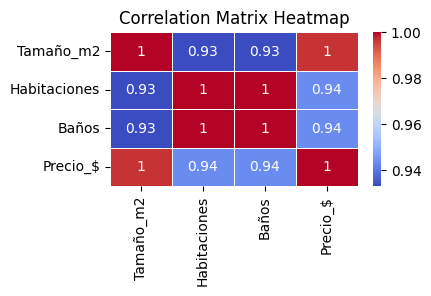

Forma de X: (10, 3)
Forma de y: (10,)
Error Cuadrático Medio (MSE): 3763555555.5555825
Raíz del Error Cuadrático Medio (RMSE): 61347.82437507937
Coeficiente de Determinación (R^2): 0.9923192743764172
Número de coeficientes: 3
Coeficientes del modelo:
Tamaño en metros cuadrados: 14799.999999999995
Número de habitaciones: 33333.33333333339
Número de baños: 33333.33333333338
Intercepto del modelo: 1845333.3333333337


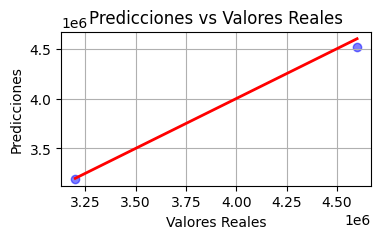

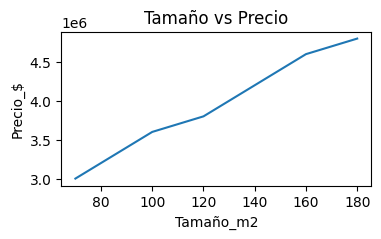

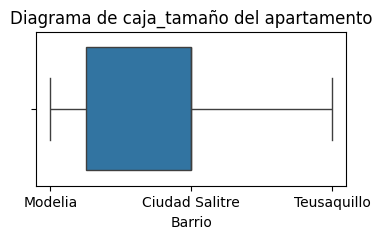

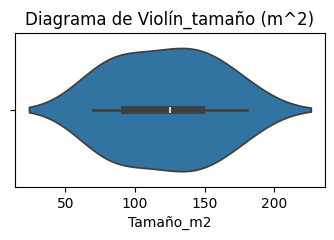

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from pytz import timezone

# Cargar archivo 'Arriendos.xlsx'
file_name = 'Arriendos.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_name)

# Mostrar las primeras filas del DataFrame
#print(df.head())


# Saludar dependiendo de la hora (formato militar: 0-23 horas)
hora_1 = datetime.datetime.now(timezone('UTC'))
hora_actual = hora_1.astimezone(timezone('America/Bogota'))
hora = hora_actual.hour
print()
if 0 <= hora <= 12:
    print("\033[0;30m" + 'Buenos días:')
elif 12 < hora <= 18:
    print("\033[0;30m" + 'Buenas tardes:')
else:
    print("\033[0;30m" + 'Buenas noches:')


# Definir el estilo para agregar un marco alrededor de la tabla y
#formatear la columna "Precio"
styled_df = df.style.format({'Precio_$': '{:,.0f}'.format}).set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Mostrar el DataFrame con el estilo aplicado
print()
display(styled_df)
print()
#print("Columnas del DataFrame:", df.columns)

#Estadísticas
#A la parte de estadística se le dio formato con la ayuda de ChatGPT
#Pregunta: Cómo puedo formatear el DataFrame para mostrar sin decimales las variables numéricas
#y rellenar los valores NaN con cadena vacía en el DataFrame de estadísticas formateadas
# Descriptive stats incluyendo todas las columnas
df_stats = df.describe(include='all')

# Formatear el DataFrame para mostrar sin decimales las variables numéricas
df_stats_formatted = df_stats.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_stats_formatted[numeric_columns] = df_stats_formatted[numeric_columns].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)

# Rellenar los valores NaN con cadena vacía en el DataFrame de estadísticas formateadas
df_stats_formatted.fillna('', inplace=True)

print("\033[1;35m")
print("Estadísticas")
print ("\033[0;30m")
print(df_stats_formatted)

df_describe_reset = df.describe().reset_index()
df_describe_reset_transpuesto = df_describe_reset.transpose()
df_describe_transpuesto = df.describe().transpose()
df_describe_transpuesto_final = df_describe_transpuesto.copy()

# Calcular el rango, varianza y coeficiente de variación
df_describe_transpuesto_final['range'] = df_describe_transpuesto_final['max'] - df_describe_transpuesto_final['min']
df_describe_transpuesto_final['variance'] = df_describe_transpuesto_final['std'] ** 2
df_describe_transpuesto_final['variation_coef'] = df_describe_transpuesto_final['std'] / df_describe_transpuesto_final['mean']
# Seleccionar solo las columnas numéricas que no son varianza ni coeficiente de variación
numeric_columns_1 = df_describe_transpuesto_final.select_dtypes(include=[np.number]).columns
numeric_columns_to_format = numeric_columns_1.difference(['variance', 'variation_coef'])
# Aplicar el formato solo a las columnas seleccionadas
df_describe_transpuesto_final[numeric_columns_to_format] = df_describe_transpuesto_final[numeric_columns_to_format].applymap(lambda x: f'{int(x):,}' if not pd.isna(x) else x)
# Imprimir el DataFrame formateado
print("\033[1;35m")
print('Estadísticas con rango, varianza y coeficiente de variación')
print ("\033[0;30m")
print(df_describe_transpuesto_final)


# Filtrar las columnas relevantes para el análisis
df1 = df[['Tamaño_m2', 'Habitaciones', 'Baños', 'Precio_$']]

# Calcular la matriz de correlación
correlation_matrix = df1.corr()

# Imprimir la matriz de correlación
print()
print("\033[1;35m")
print("Matrix de correlación:")
print ("\033[0;30m")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un heatmap
print()
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
print("\033[1;35m")
plt.title('Correlation Matrix Heatmap')
print ("\033[0;30m")
plt.show()

# Separar las características (variables independientes) y la variable objetivo (dependiente)
X = df[['Tamaño_m2', 'Habitaciones', 'Baños']]
y = df['Precio_$']

#print("\033[1;35m")
#plt.title('Correlación')
#print ("\033[0;30m")

# Verificar las formas de X y y
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Verificar el número de coeficientes
num_coef = len(modelo.coef_)
print(f"Número de coeficientes: {num_coef}")

if num_coef == 3:
    print("Coeficientes del modelo:")
    print(f"Tamaño en metros cuadrados: {modelo.coef_[0]}")
    print(f"Número de habitaciones: {modelo.coef_[1]}")
    print(f"Número de baños: {modelo.coef_[2]}")
else:
    print(f"Error: El modelo tiene {num_coef} coeficientes, pero se esperaban 3.")

print(f"Intercepto del modelo: {modelo.intercept_}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

# Mostrar otras gráficas
plt.figure(figsize=(4, 2))
ax = sns.lineplot(
    x=df.columns[1],
    y=df.columns[4],
    data=df,
)
ax.set_title('Tamaño vs Precio')  # Agregar título al gráfico
plt.show()

print()
plt.figure(figsize=(4, 2))
sns.boxplot(x=df.columns[0], data = df)
plt.title('Diagrama de caja_tamaño del apartamento')

print()
plt.figure(figsize=(4, 2))
ax = sns.violinplot(x=df.columns[1], data=df)
ax.set_title('Diagrama de Violín_tamaño (m^2)')  # Agregar título al gráfico
plt.show()